In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

dataset = pd.read_csv('jobfair_train.csv')
dataset = dataset.sort_values(by='league_id')
dataset = dataset.drop('registration_country', axis=1)
dataset = dataset.drop('registration_platform_specific', axis=1)
dataset = dataset.drop('season', axis=1)

In [3]:
'''Dynamic_Payment_Segment'''
new_dynamic = {'0) NonPayer': 0, '1) ExPayer': 1, '2) Minnow': 2, '3) Dolphin': 3, '4) Whale': 4}
dataset['dynamic_payment_segment'] = dataset['dynamic_payment_segment'].map(new_dynamic)
#print(dataset['dynamic_payment_segment'][:40])

'''Global_Competition_Level'''
dataset['global_competition_level'].fillna(0, inplace = True)
#print(dataset['global_competition_level'][:40])

In [41]:
dataset_2D_1 = dataset[['playtime_last_28_days', 'session_count_last_28_days', 'league_rank']].copy()
dataset_2D_2 = dataset[['playtime_last_28_days', 'league_match_won_count_last_28_days', 'league_rank']].copy()
dataset_2D_3 = dataset[['playtime_last_28_days', 'avg_stars_top_11_players', 'league_rank']].copy()
dataset_2D_4 = dataset[['playtime_last_28_days', 'training_count_last_28_days', 'league_rank']].copy()
dataset_2D_5 = dataset[['playtime_last_28_days', 'tokens_spent_last_28_days', 'league_rank']].copy()
dataset_2D_6 = dataset[['playtime_last_28_days', 'league_id', 'league_rank']].copy()
dataset_2D_7 = dataset[['playtime_last_28_days', 'avg_training_factor_top_11_players', 'league_rank']].copy()

In [37]:
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
def plotting(data):
    sc = StandardScaler()
    X_train = sc.fit_transform(data.iloc[:,:-1].values)
    y_train = data.iloc[:, -1].values

    for i, j in enumerate(np.unique(y_train)):
        plt.scatter(X_train[y_train == j, 0], X_train[y_train == j, 1], label = j)

    plt.xlabel(data.columns[0])
    plt.ylabel(data.columns[1])
    plt.legend()
    plt.show()



# Tests

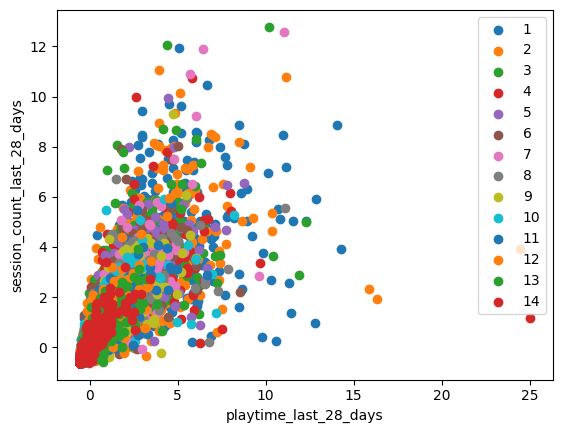

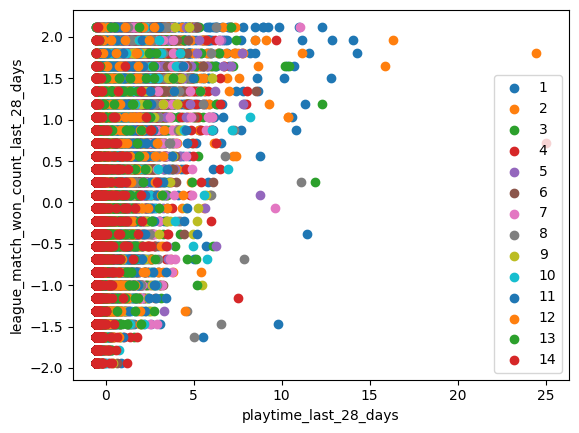

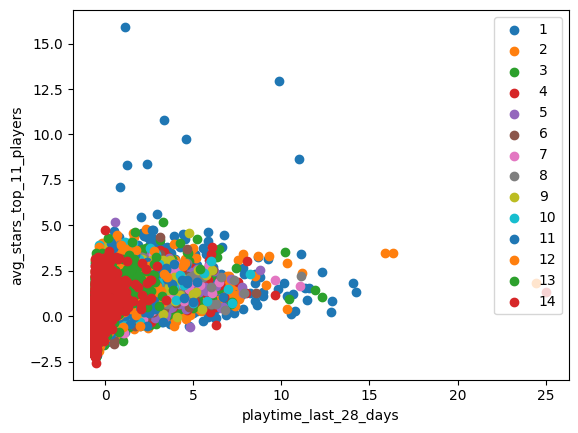

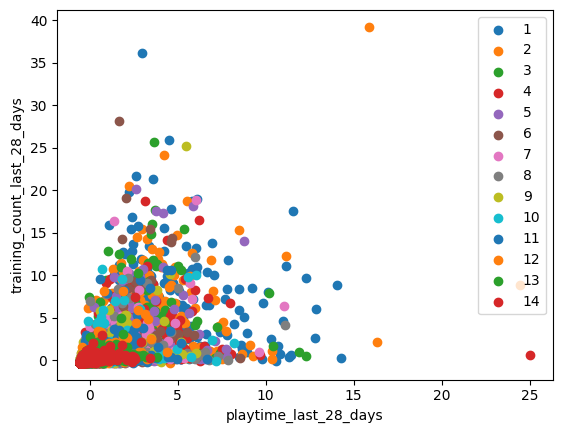

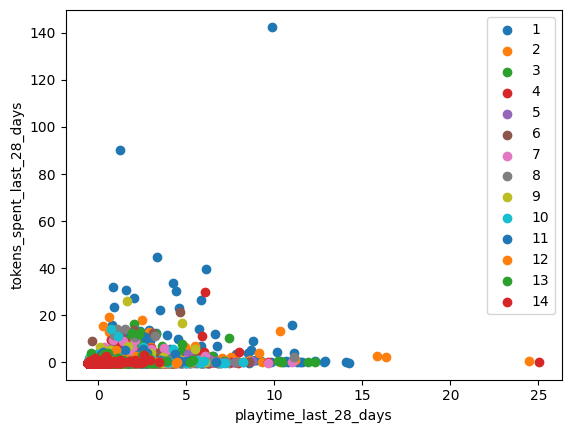

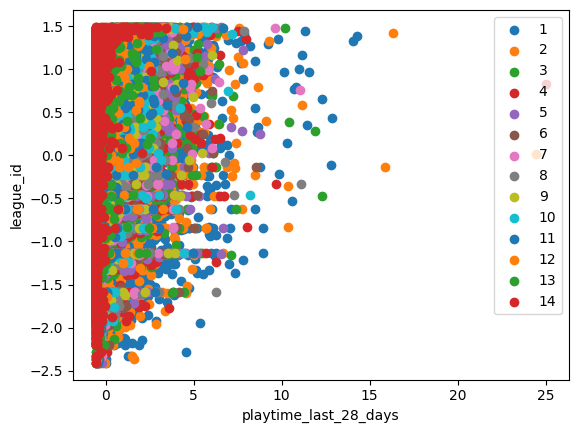

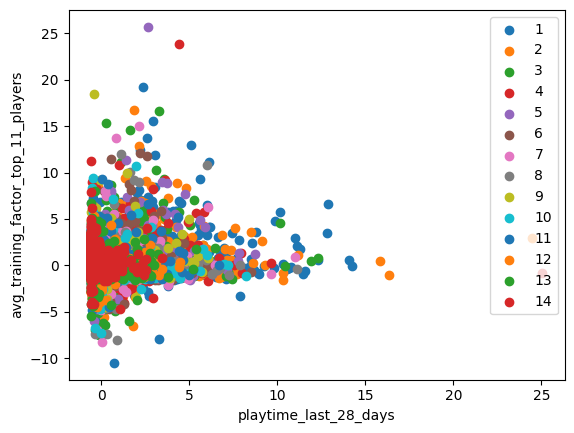

In [42]:
plotting(dataset_2D_1)
plotting(dataset_2D_2)
plotting(dataset_2D_3)
plotting(dataset_2D_4)
plotting(dataset_2D_5)
plotting(dataset_2D_6)
plotting(dataset_2D_7)